Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

#Desempenho Preditivo

---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário definindo uma classe como positiva e a outra como negativa. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


0.0    100
1.0     50
Name: target, dtype: int64

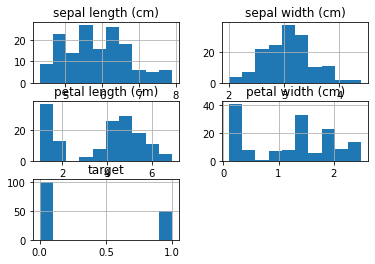

In [ ]:
# Transforme sua base em binária, isso pode ser feito apenas uma vez antes dos outros experimentos.
# usando o Iris como exemplo, mas a resolução seria similar para as outras base
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
dataframe = pd.DataFrame(data=np.c_[iris.data, iris.target], columns= iris['feature_names'] + ['target'])
dataframe.target = dataframe.target.replace(to_replace = 2, value = 0)

classe_0 = dataframe[dataframe['target'] == 0]
classe_1 = dataframe[dataframe['target'] == 1]
dataframe = pd.concat([classe_0, classe_1])
dataframe = dataframe.reset_index(drop=True)

_ = dataframe.hist()
dataframe['target'].value_counts()

In [ ]:
def preprocess(x_treino, x_teste, y_treino, y_teste):
  # Aqui poderia ser feito normalização e outras transformações
  x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo = x_treino, x_teste, y_treino, y_teste
  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

### Questão 02.

Implemente a função que retorna a matriz de confusão, escolha duas métricas e crie 2 funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [ ]:
def confusion_matrix(y_test, y_pred):
  conf = np.zeros((2,2))
  conf[0,0] = np.logical_and(y_test == 0, y_pred == 0).sum()
  conf[0,1] = np.logical_and(y_test == 0, y_pred == 1).sum()
  conf[1,1] = np.logical_and(y_test == 1, y_pred == 1).sum()
  conf[1,0] = np.logical_and(y_test == 1, y_pred == 0).sum()
  return conf

actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix(actual, predicted)
print(conf_mat)

[[1. 3.]
 [2. 4.]]


In [ ]:
# mudar o nome de acordo com sua métrica
def accuracy_score(y_test, y_pred):
  tn = np.logical_and(y_test == 0, y_pred == 0).sum()
  tp = np.logical_and(y_test == 1, y_pred == 1).sum()
  return tn+tp/len(y_test)

### Questão 03.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no conjunto de teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...).

Execute a função *classificacao* definida no notebook com a função de pré-processamento e as medidas de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from numpy import mean, std
from matplotlib import pyplot as plt


def classificacao(data, columns, target, preproc_fn, score_fn, score_name, conf_matrix_fn,
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    conf_matrix_fn: Função. Calcula matriz de confusão
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron,
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))

    clfs = [prcp, dt]
    clfs_names = ['perceptron', 'dt']

    #Inicializa estruturas para matrizes de confusão
    confusion_matrices = {
        'perceptron': np.zeros((2,2)),
        'dt': np.zeros((2,2)),
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)

    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):

            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]

            # x_train, y_train, x_test, y_test = preproc_fn(x_train, x_test, y_train, y_test)
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)

            # valores preditos pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)

            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score_fn(y_test, y_pred) )
            confusion_matrices[c_name] += conf_matrix_fn(y_test, y_pred)

    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names],
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()

    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

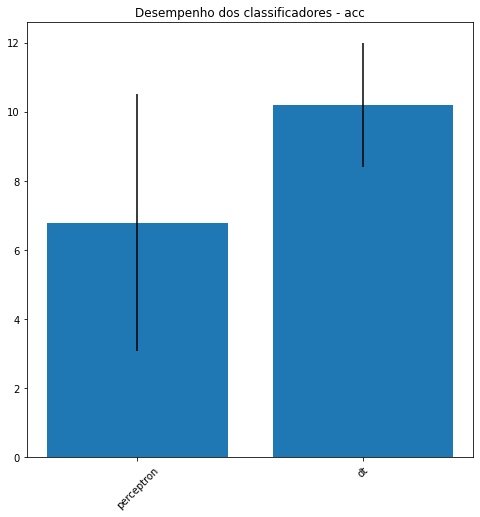

array([[66., 34.],
       [21., 29.]])

In [ ]:
results = classificacao(dataframe, [0, 1, 2, 3], 4, preproc_fn=preprocess, score_fn=accuracy_score,
                        score_name='acc', conf_matrix_fn=confusion_matrix, folds=10)
results['confusion_matrices']['perceptron']

---

### Questão 03.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

Essas execuções podem demorar um pouco, então tenham paciência.

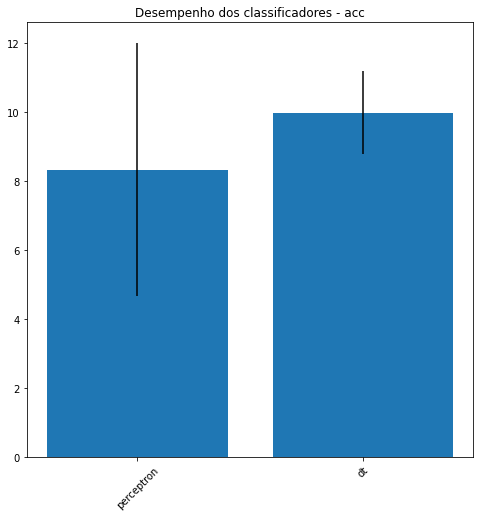

array([[82., 18.],
       [30., 20.]])

In [ ]:
results = classificacao(dataframe, [0, 1, 2, 3], 4, preproc_fn=preprocess, score_fn=accuracy_score,
                        score_name='acc', conf_matrix_fn=confusion_matrix, folds=10)
results['confusion_matrices']['perceptron']

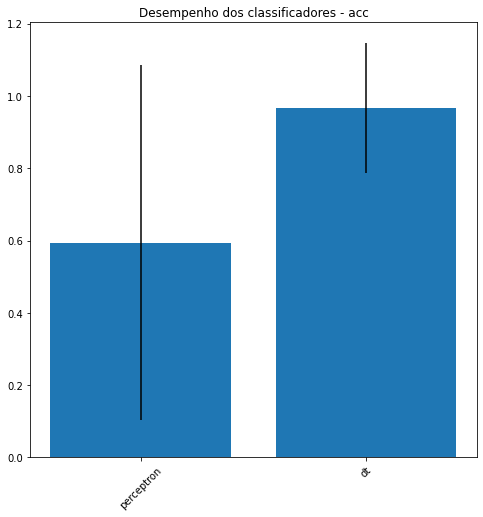

array([[77., 23.],
       [38., 12.]])

In [ ]:
results = classificacao(dataframe, [0, 1, 2, 3], 4, preproc_fn=preprocess, score_fn=accuracy_score,
                        score_name='acc', conf_matrix_fn=confusion_matrix, folds=len(dataframe.index))
results['confusion_matrices']['perceptron']